In [31]:
%run Model_CFE.ipynb

/Users/emillundquist/Library/Python/3.9/lib/python/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


ADS: frdp_c --> AMOR + ppi_c
CPR1_CYP71AV1: AMOR + h_c + nadph_c + o2_c --> AAOH + h2o_c + nadp_c
ADH1: AAOH + nad_c --> AAld + h_c + nadh_c
ALDH1: AAld + h2o_c + nadp_c --> AA + h_c + nadph_c


Adding reaction for the extraction of AA.

In [32]:
new_reaction5 = Reaction('EXT_AA')
new_reaction5.add_metabolites({artemisinic_acid: -1})
print(new_reaction5.build_reaction_string())

iMM904.add_reactions([new_reaction5])
iMM904.reactions.EXT_AA  

AA --> 


Reaction identifier,EXT_AA
Name,
Memory address,0x13ffb68b0
Stoichiometry,AA --> artemisinic_acid -->
GPR,
Lower bound,0.0
Upper bound,1000.0


Calculating the weigths of the relevant metabolites biomas, AA and glucose

In [33]:
from cobra.flux_analysis import production_envelope
with iMM904:
#Calculate weights of the metabolites
    C = 12
    H = 1
    N = 14
    O = 16
    biomass_weight = C*47.5+H*7+N*9.25 #g/mol, this is the median measurement of S. cerevisiae composition. ##Check source
    AA_weight = iMM904.metabolites.AA.elements['C']*C+iMM904.metabolites.AA.elements['H']*H #g/mol
    glucose_weight = iMM904.metabolites.glc__D_c.elements['C']*C+iMM904.metabolites.glc__D_c.elements['H']*H+iMM904.metabolites.glc__D_c.elements['O']*O

Finding maximum growth:

In [34]:
solution = iMM904.optimize()
initial_growth = iMM904.optimize().objective_value

Calculating and printing yields of biomass

In [35]:
yield_X_glc_g = (initial_growth/abs(solution.fluxes["EX_glc__D_e"]))*(biomass_weight/glucose_weight)
yield_X_glc_mol = initial_growth/abs(solution.fluxes["EX_glc__D_e"])
print("Max growth flux on glucose:",round(initial_growth,3), "\tmmol*gDW^1*h^-1")
print("Yield biomass/glc:\t\t", round(yield_X_glc_mol,3),"\tmol/mol")
print("Yield biomass/glc:\t\t", round(yield_X_glc_g*1000,3), "mg/g")

Max growth flux on glucose: 0.288 	mmol*gDW^1*h^-1
Yield biomass/glc:		 0.029 	mol/mol
Yield biomass/glc:		 112.987 mg/g


1. Find max production at at least 1 % growth flux.
2. Find max amounts of extracted AA and max  artemisinic acidflux

In [36]:
#1:
iMM904.reactions.BIOMASS_SC5_notrace.bounds = initial_growth*0.01, 100
print('\nInvestigation of maximum artemisinic acid yield with a min growth flux of 1 % of the max growth flux:', round(initial_growth*0.01,6))
#2:
iMM904.objective = iMM904.reactions.EXT_AA
solution = iMM904.optimize()
initial_AA_flow = iMM904.optimize().objective_value 


Investigation of maximum artemisinic acid yield with a min growth flux of 1 % of the max growth flux: 0.002879


Yield calculations of artemisinic acid at min 1% growth flux

In [37]:
yield_b_glc_g = (initial_AA_flow/abs(solution.fluxes["EX_glc__D_e"]))*(AA_weight/glucose_weight)
yield_b_glc_mol = initial_AA_flow/abs(solution.fluxes["EX_glc__D_e"])
yield_b_X_g = (initial_AA_flow/abs(solution.fluxes["BIOMASS_SC5_notrace"]))*(AA_weight/biomass_weight)
yield_b_X_mol = initial_AA_flow/abs(solution.fluxes["BIOMASS_SC5_notrace"])
    
print("Max artemisinic acid flux on glucose:\t",round(initial_AA_flow,2))
print("Yield AA/glc:\t\t", round(yield_b_glc_mol,3), "\t\tmol/mol")
print("Yield AA/glc:\t\t", round(yield_b_glc_g*1000,3), "\tmg/g\n")    
print("Yield AA/biomass:\t", round(yield_b_X_mol,3), "\tmol/mol")
print("Yield AA/biomass:\t", round(yield_b_X_g*1000,3), "\tmg/g\n")

Max artemisinic acid flux on glucose:	 0.83
Yield AA/glc:		 0.083 		mol/mol
Yield AA/glc:		 92.628 	mg/g

Yield AA/biomass:	 286.729 	mol/mol
Yield AA/biomass:	 81980.679 	mg/g



Finding max production at at least 99.9 % growth flux.

In [38]:
print('\nInvestigation of maximum artemisinic acid yield with a min growth flux of 99.9 % of the max growth flux:', round(initial_growth*0.999,6))
iMM904.reactions.BIOMASS_SC5_notrace.bounds = initial_growth*0.999, 100
solution = iMM904.optimize()
AA_flow_maxgrowth = iMM904.optimize().objective_value 


Investigation of maximum artemisinic acid yield with a min growth flux of 99.9 % of the max growth flux: 0.287578


Calculate yields of artemisinic acid

In [39]:
yield_b_glc_g = (AA_flow_maxgrowth /abs(solution.fluxes["EX_glc__D_e"]))*(AA_weight/glucose_weight)
yield_b_glc_mol =AA_flow_maxgrowth /abs(solution.fluxes["EX_glc__D_e"])
yield_b_X_g = (AA_flow_maxgrowth /abs(solution.fluxes["BIOMASS_SC5_notrace"]))*(AA_weight/biomass_weight)
yield_b_X_mol = AA_flow_maxgrowth /abs(solution.fluxes["BIOMASS_SC5_notrace"])

The yields

In [40]:
print("Max artemisinic acid flux on glucose:\t",round(initial_AA_flow,2))
print("Yield AA/glc:\t\t", round(yield_b_glc_mol,6), "\tmol/mol")
print("Yield AA/glc:\t\t", round(yield_b_glc_g*1000,3), "\t\tmg/g\n")
print("Yield AA/biomass:\t", round(yield_b_X_mol,6), "\tmol/mol")
print("Yield AA/biomass:\t", round(yield_b_X_g*1000,3), "\t\tmg/g")

Max artemisinic acid flux on glucose:	 0.83
Yield AA/glc:		 0.000144 	mol/mol
Yield AA/glc:		 0.161 		mg/g

Yield AA/biomass:	 0.005001 	mol/mol
Yield AA/biomass:	 1.43 		mg/g


In [41]:
with iMM904:
    iMM904.objective = iMM904.reactions.EXT_AA 
    print("Maximum artemisinic acid flux: ",iMM904.optimize().objective_value)
    solution = iMM904.optimize()
    print("Growth rate at maximum artemisinic acid flux: ", solution.fluxes['BIOMASS_SC5_notrace'])

Maximum artemisinic acid flux:  0.0014381800197799193
Growth rate at maximum artemisinic acid flux:  0.2875778380003134


Plotting the growthrate in relation to artemisinic acid production on glucose. 

In [42]:
with iMM904:
    medium=iMM904.medium                             #Resets medium to standard
    medium['EX_o2_e']= 2.0                           #Reset the oxygen level
    iMM904.medium = medium 
    solution_growth = iMM904.slim_optimize(error_value=0.)

Plot the relation between growth and artemisinic acid produciton 

EX_glc__D_e plot, where x is artemisinic acid flux, y is biomass flux: 


<Axes: xlabel='EXT_AA'>

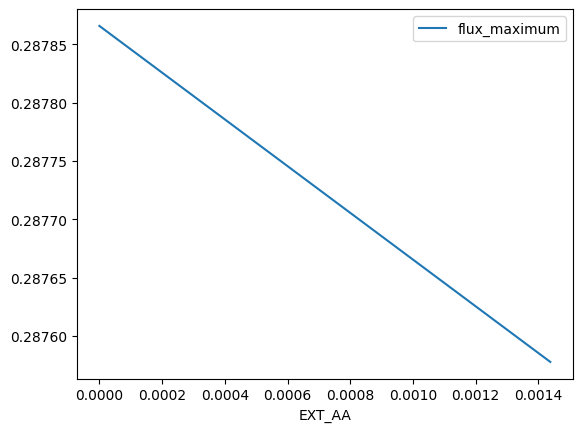

In [43]:
print("EX_glc__D_e plot, where x is artemisinic acid flux, y is biomass flux: ")
max_AA =production_envelope(iMM904,reactions=[iMM904.reactions.EXT_AA], objective=iMM904.reactions.BIOMASS_SC5_notrace) 
max_AA.plot(x='EXT_AA', y='flux_maximum')

In [44]:
carbon_source_exchanges=[]                                    #Creates list to save carbon sources
for exchange in iMM904.exchanges:                             #Iterate through all exchange reactions
    for metabolite in exchange.metabolites:                   #Iterate through metabolites
        if "C" in metabolite.elements:                        #Save all reactions that contains carbon
            carbon_source_exchanges.append(exchange.id) 

print("\033[1mYield of artemisinic acid on carbon sources with higher og equal flows as from glucose:\033[0m\n")
print("The yield AA/glc on 99.9% growth flow:\t\t", round(yield_b_glc_mol,6), "\tmol/mol\n")

Yield of artemisinic acid on carbon sources with higher og equal flows as from glucose:

The yield AA/glc on 99.9% growth flow:		 0.000144 	mol/mol



Investigate growth rates and artemisinic acid for different carbon sources.

In [45]:
print("\033[1mGrowth and production at different carbon sources: \033[0m\n")
potential_better_Csources = []                                 
yeild_dict = dict()

Growth and production at different carbon sources: 



Rotatating through carbon sources to determine relevant candidates.

In [46]:
for i in range (0,len(carbon_source_exchanges)):               
    with iMM904:                                       
        #Change medium
        medium=iMM904.medium                                               #Resets medium to standard
        medium['EX_glc__D_e']= 0                                                 #sets glucose level to 0
        medium[carbon_source_exchanges[i]]= 10                                   #sets level of carbon source to 10
        iMM904.medium = medium                           
        
        #Save max growth floux
        solution_growth = iMM904.slim_optimize(error_value=0.)

        #growth flux equal or higher than on glucose
        if round(solution_growth,5) >= round(initial_growth,5): 
            #Find yields of artemisinic acid at 99.9 % max growth flux
            iMM904.reactions.BIOMASS_SC5_notrace.bounds = solution_growth*0.999, 100
            solution = iMM904.optimize()
            iMM904.objective = iMM904.reactions.EXT_AA               
            solution_AA = iMM904.optimize().objective_value               
            yield_b_carbon_mol = solution_AA /abs(solution.fluxes[carbon_source_exchanges[i]])
            
            #artemisinic acid yield is equal or higher than at glucose
            if round(yield_b_carbon_mol,5) > round(yield_b_glc_mol,5):
                #Save carbon source and caluclate yields.
                potential_better_Csources.append(carbon_source_exchanges[i])      
                name=iMM904.reactions.get_by_id(carbon_source_exchanges[i]) #Get reaction name
                yield_AA_x_mol = solution_AA / abs(solution.fluxes['BIOMASS_SC5_notrace'])
                yeild_dict[yield_AA_x_mol] = carbon_source_exchanges[i]
                
                #Print yields: 
                solution = iMM904.optimize()
                print(name.name+":")   #print name 
                print('Yield AA/carbon:', round(yield_b_carbon_mol,6), "mol/mol") #mol product / mol carbon source
                print('Yield AA/carbon increase:',round((yield_b_carbon_mol/yield_b_glc_mol)*100-100,2), "%")
                print('Yield AA/biomass:', round(yield_AA_x_mol,6), "mol/mol") #mol product / mol biomass
                print('Yield AA/biomass increase:', (yield_AA_x_mol/yield_b_X_mol)*100-100, "%\n")
print("There are "+ str(len(potential_better_Csources)) + " exchange reactions that can give a equal or higher growth rate and artemisinic acid production compared to glucose.")


D-Glucosamine 6-phosphate exchange:
Yield AA/carbon: 0.019042 mol/mol
Yield AA/carbon increase: 13140.54 %
Yield AA/biomass: 0.555076 mol/mol
Yield AA/biomass increase: 10999.274595601673 %



/Users/emillundquist/Library/Python/3.9/lib/python/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/emillundquist/Library/Python/3.9/lib/python/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/emillundquist/Library/Python/3.9/lib/python/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/emillundquist/Library/Python/3.9/lib/python/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


There are 1 exchange reactions that can give a equal or higher growth rate and artemisinic acid production compared to glucose.


Finding the best carbon source according to the model

In [47]:
import operator
max_exchange = max(yeild_dict.items(), key=operator.itemgetter(0))[1]
print(max_exchange)

iMM904.reactions.EX_xtsn_e

iMM904.metabolites.xtsn_e

EX_gam6p_e


Metabolite identifier,xtsn_e
Name,Xanthosine
Memory address,0x1689c32e0
Formula,C10H12N4O6
Compartment,e
In 2 reaction(s),"EX_xtsn_e, XTSNt2"
